# Comparison original sample to double peaks removed

In [1]:
import glob

from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

In [2]:
gal_name = '8144-6104'
#gal_name = '8241-9101'
#gal_name = '8600-12702'
#gal_name = '8996-12701'
gal_name = '9042-9101'

spectra_csv_original = Table.read('./original/'+'Spectra_stacks_'+gal_name+'.csv')
spectra_fits_original = fits.open('./original/'+'Spectra_stacks_'+gal_name+'.fits')
fastspec_table_original = Table.read('./original/'+'stackfit_Spectra_stacks_'+gal_name+'.fits')

spectra_csv_dp = Table.read('./Double_peak_correction/'+'Spectra_stacks_Nov_'+gal_name+'.csv')
spectra_fits_dp = fits.open('./Double_peak_correction/'+'Spectra_stacks_Nov_'+gal_name+'.fits')
fastspec_table_dp = Table.read('./Double_peak_correction/'+'stackfit_Spectra_stacks_Nov_'+gal_name+'.fits')

/tmp/ipykernel_2337938/1865058175.py:4: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i]-spectra_fits_original['IVAR'].data[i]**-0.5, spectra_fits_original['FLUX'].data[i]+spectra_fits_original['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_original['FLUX'].data)))


(0.0, 250.0)

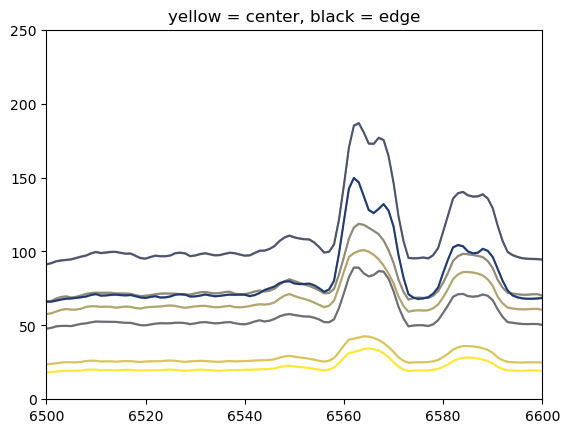

In [3]:
cmap = plt.get_cmap('cividis_r')
for i in range(len(spectra_fits_original['FLUX'].data)):
    plt.plot(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i], c=cmap(i/len(spectra_fits_original['FLUX'].data)))
    plt.fill_between(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i]-spectra_fits_original['IVAR'].data[i]**-0.5, spectra_fits_original['FLUX'].data[i]+spectra_fits_original['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_original['FLUX'].data)))
plt.title('yellow = center, black = edge')
plt.xlim(6500,6600)
plt.ylim(0,250)

/tmp/ipykernel_2337938/2673451109.py:9: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i]-spectra_fits_dp['IVAR'].data[i]**-0.5, spectra_fits_dp['FLUX'].data[i]+spectra_fits_dp['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_dp['FLUX'].data)))


(0.0, 250.0)

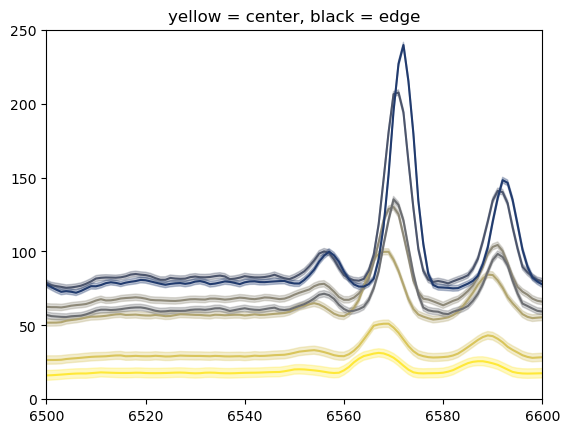

In [4]:
#cmap = plt.get_cmap('cividis_r')
#for i in range(len(spectra_fits_original['FLUX'].data)):
#    plt.plot(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i], c=cmap(i/len(spectra_fits_original['FLUX'].data)))
#plt.title('yellow = center, black = edge')

cmap = plt.get_cmap('cividis_r')
for i in range(len(spectra_fits_dp['FLUX'].data)):
    plt.plot(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i], c=cmap(i/len(spectra_fits_dp['FLUX'].data)))
    plt.fill_between(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i]-spectra_fits_dp['IVAR'].data[i]**-0.5, spectra_fits_dp['FLUX'].data[i]+spectra_fits_dp['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_dp['FLUX'].data)))

plt.title('yellow = center, black = edge')
plt.xlim(6500,6600)
plt.ylim(0,250)

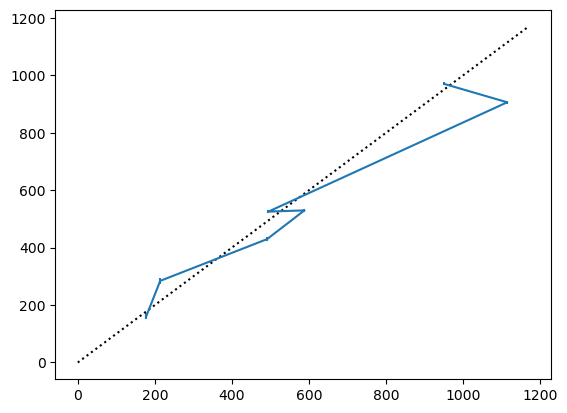

In [5]:
plt.errorbar(fastspec_table_original['HALPHA_FLUX'], fastspec_table_dp['HALPHA_FLUX'], xerr=fastspec_table_original['HALPHA_FLUX_IVAR']**-0.5, yerr=fastspec_table_dp['HALPHA_FLUX_IVAR']**-0.5)
line = np.linspace(0,1.05*np.max(fastspec_table_original['HALPHA_FLUX']),100)
plt.plot(line,line,linestyle=':', c='k')

In [6]:
fastspec_table_dp['HALPHA_FLUX_IVAR']

0.008974915
0.008248858
0.019499516
0.023508422
0.026206339
0.029320013
0.03489832


In [7]:
fastspec_table_original['HALPHA_FLUX_IVAR']

0.7923575
0.677023
0.4201944
0.3852847
0.42281985
0.2940182
0.3210215
